In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('linear_data.csv')
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [7]:
df[['x']].head()

,x
0,0.00000
1,0.02004
2,0.04008
3,0.06012
4,0.08016


In [8]:
df['y']

0       4.447692
1       5.024612
2       5.869593
3       4.722490
4       4.877101
         ...    
495    25.356174
496    24.417804
497    25.625916
498    24.269704
499    24.732043
Name: y, Length: 500, dtype: float64

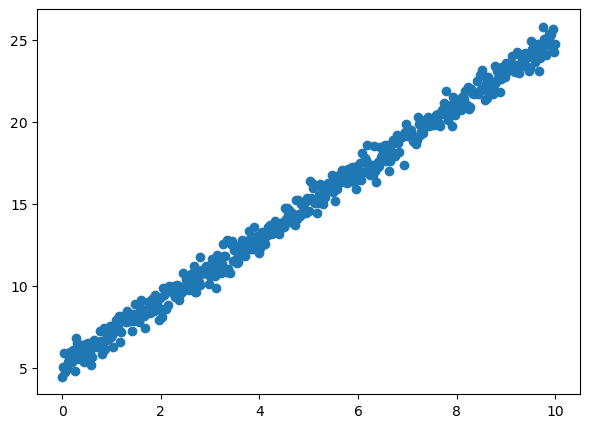

In [14]:
plt.figure(figsize=(7,5)) #This line sets up the figure (the canvas or area where the plot will be drawn) with a specific size of 7 inches in width and 5 inches in height.
plt.scatter(df[['x']],df['y'])

In [15]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


<h1>Non-Linear</h1>

In [17]:
df2 = pd.read_csv('nonlinear_data.csv') 
df2.head() 

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


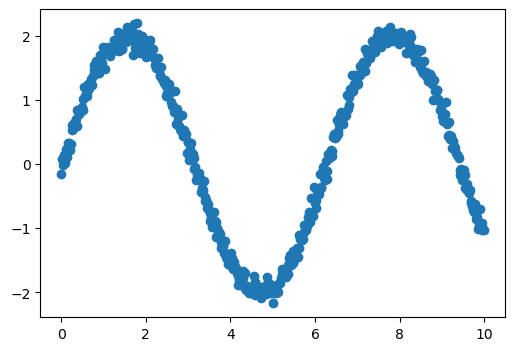

In [21]:
plt.figure(figsize=(6,4))
plt.scatter(df2[['x']],df2['y'])

In [22]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


plt.figure(): This function initializes a new figure.

plt.subplot(): This function adds a subplot to the figure. The subplot function takes three arguments: the number of rows, the number of columns, and the index of the current subplot and subplot(1, 2, 1): This specifies that the figure should be divided into 1 row and 2 columns of subplots, and the 1 at the end indicates that this is the first subplot.

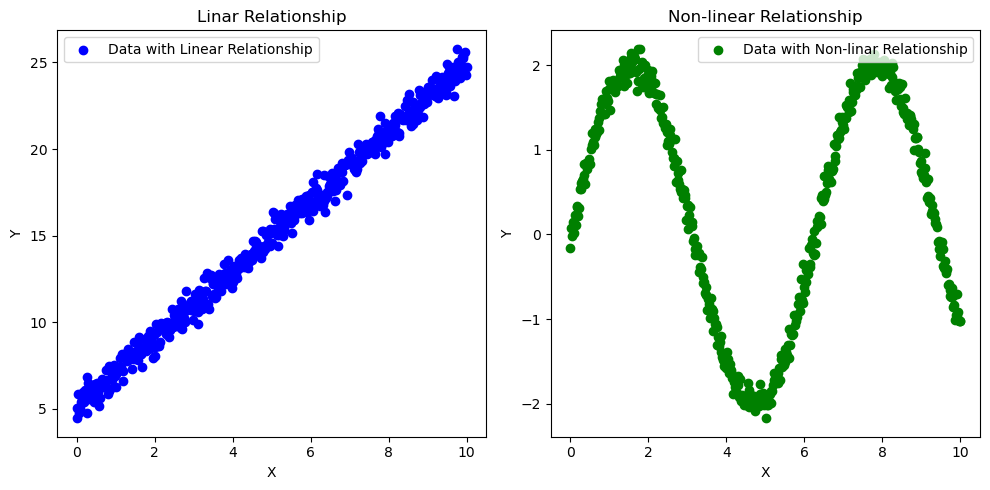

In [36]:
#linear
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)

plt.scatter(df.x,df.y,color='blue',label = 'Data with Linear Relationship')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linar Relationship')

#non-linar
plt.subplot(1,2,2)
plt.scatter(df2.x,df2.y,color='green',label='Data with Non-linar Relationship')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')

plt.tight_layout()  #adjusts the subplots to fit into the figure area properly
plt.show() # to display the plot that has been created using matplotlib

<h1>Correlation coefficients</h1>

In [37]:
correlation_linear = np.corrcoef(df.x, df.y)
print("Correlation coefficient for linear relationship:", correlation_linear)

Correlation coefficient for linear relationship: [[1.         0.99643985]
 [0.99643985 1.        ]]


In [38]:
df.corr() # correlation

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [41]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


<h1>Linear</h1>

In [43]:
from sklearn.linear_model import LinearRegression

In [45]:
df.head() #strong positive correlation

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [46]:
reg1 = LinearRegression()

In [47]:
reg1.fit(df[['x']],df.y)

LinearRegression()

In [49]:
reg1.score(df[['x']],df[['y']])

0.9928923730526016

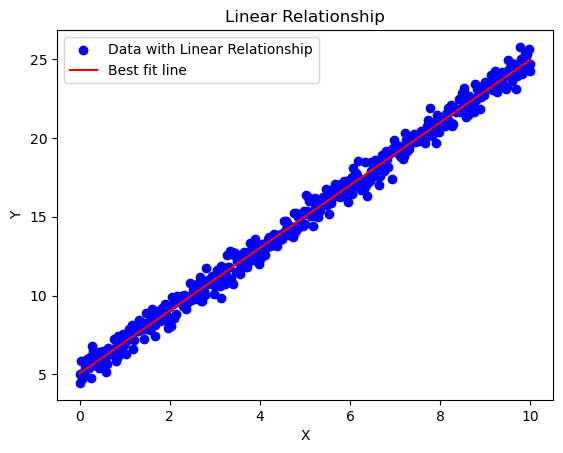

In [54]:
plt.scatter(df[['x']],df.y,color='blue',label='Data with Linear Relationship')
plt.plot(df[['x']],reg1.predict(df[['x']]),color='red',label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

<h1>Non Linear Data df2</h1>

In [55]:
df2.head()  #here df have mild negative correlation

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [56]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


In [57]:
reg2 = LinearRegression()

In [58]:
reg2.fit(df2[['x']],df2.y)

LinearRegression()

In [60]:
reg2.score(df2[['x']],df2.y)

0.004321199719043656

plt.figure(figsize=(9,6))

plt.scatter(df2.x,df2.y,color='green',label='Data with Non-linear Relationship')
plt.plot(df2[['x']],reg2.predict(df2[['x']]),color='red',label = 'Best fit line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

<h1>Polynomial Regression</h1>

In [66]:
from sklearn.preprocessing import PolynomialFeatures

In [76]:
poly = PolynomialFeatures(degree=7) #Polymonial regression with degree n
X_poly = poly.fit_transform(df2[['x']])

In [77]:
X_poly.shape

(500, 8)

In [78]:
pd.DataFrame(X_poly).head()

,0,1,2,3,4,5,6,7
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09,6.477340e-11,1.298064e-12
2,1.0,0.04008,0.001606,0.000064,2.580583e-06,1.034302e-07,4.145498e-09,1.661522e-10
3,1.0,0.06012,0.003614,0.000217,1.306420e-05,7.854229e-07,4.721981e-08,2.838866e-09
4,1.0,0.08016,0.006426,0.000515,4.128932e-05,3.309766e-06,2.653119e-07,2.126748e-08


In [79]:
df2.x.head()

0    0.00000
1    0.02004
2    0.04008
3    0.06012
4    0.08016
Name: x, dtype: float64

In [80]:
reg_poly = LinearRegression()

In [81]:
reg_poly.fit(X_poly,df2.y)

LinearRegression()

In [82]:
reg_poly.score(X_poly,df2.y)

0.9936598606222089

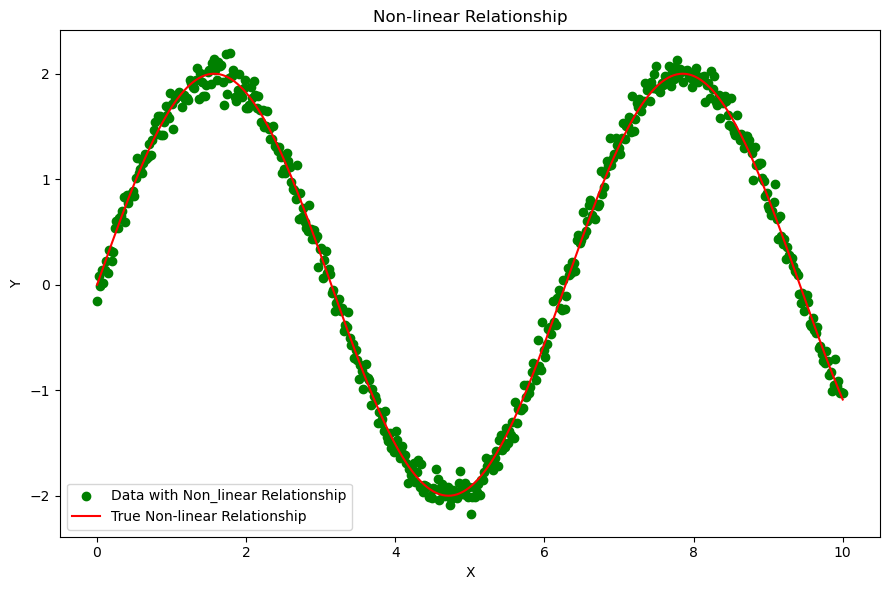

In [83]:
plt.figure(figsize=(9,6))

plt.scatter(df2.x,df2.y,color='green',label='Data with Non_linear Relationship')
plt.plot(df.x,2*np.sin(df2.x),color='red',label='True Non-linear Relationship')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')

plt.legend()
plt.tight_layout()
plt.show()

<h1>Testing Overfit or Bestfit</h1>

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
xtrain,xtest,ytrain,ytest = train_test_split(X_poly,df2.y,test_size=0.25,random_state=42)

In [86]:
xtrain.shape

(375, 8)

In [88]:
pd.DataFrame(xtrain)

,0,1,2,3,4,5,6,7
0,1.0,4.549098,20.694294,94.140377,428.253821,1948.168683,8862.410644,4.031598e+04
1,1.0,8.356713,69.834659,583.588235,4876.879639,40754.685563,340575.228054,2.846090e+06
2,1.0,4.068136,16.549733,67.326568,273.893654,1114.236707,4532.866762,1.844032e+04
3,1.0,2.525050,6.375878,16.099411,40.651820,102.647883,259.191048,6.544704e+02
4,1.0,6.593186,43.470107,286.606514,1889.650163,12458.815705,82143.293924,5.415860e+05
...,...,...,...,...,...,...,...,...
370,1.0,2.124248,4.512432,9.585526,20.362040,43.254032,91.882313,1.951809e+02
371,1.0,5.410822,29.276991,158.412576,857.142194,4637.843532,25094.544162,1.357821e+05
372,1.0,6.973948,48.635949,339.184576,2365.455560,16496.563824,115046.176565,8.023260e+05
373,1.0,8.717435,75.993671,662.469875,5775.037988,50343.517528,438866.335164,3.825789e+06


In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [90]:
reg_poly.fit(xtrain,ytrain)

LinearRegression()

In [93]:
reg_poly.score(xtrain,ytrain) #training data --> training accuracy

0.993963025440128

In [95]:
reg_poly.score(xtest,ytest) #unseen/new data --->  testing accuracy

0.9923172867605047